# Simulate Annealing for TSP problem

## Algorithm

<left><img src="https://www.researchgate.net/profile/Mohamad_Ivan_Fanany/publication/288496956/figure/fig1/AS:614317309296655@1523476068780/Pseudo-code-for-Simulated-Annealing-algorithm.png" />

<left><img src="https://ars.els-cdn.com/content/image/3-s2.0-B9780128150108000028-f02-14-9780128150108.jpg?_" />
    

# Step 0: utility function

In [1]:
%matplotlib inline
import sys
import math
import random
import matplotlib.pyplot as plt
import numpy as np

# 1 readfile utility function
def readfile(filename):
    with open(filename) as f:
        r = f.read()
        read_line = r.split('\n')   
        dic={}
        for i in range(len(read_line)):         
            read_element = read_line[i].split()
            dic[int(read_element[0])] = [int(read_element[1])]
            dic[int(read_element[0])].append(int(read_element[2]))
        f.close()
        return dic

# 2 initize a new sequence
def init(numCities): ## generate init city sequence
    seq = []
    while len(seq) < numCities:
        temp = random.randint(1,numCities)
        if temp not in seq:
            seq.append(temp)
    
    return seq

# 3 Compute distance given two cities (given d=(dx,dy) for two cities)
def distance(d):
    return math.sqrt(d[0]*d[0]+d[1]*d[1])

# 4 compute all distance of a sequence
def totalDistance(seq,dic):
    dist = 0
    for i in range(len(seq)):
        dx = dic[seq[i]][0] - dic[seq[(i+1)%51]][0]
        dy = dic[seq[i]][1] - dic[seq[(i+1)%51]][1]
        d = [dx,dy]
        dist += distance(d)
    return dist

# 5 get two cities to swap
def ran2num(maxsize):
    num = []
    num.append(random.randint(1,maxsize))
    num.append(random.randint(1,maxsize))
    return num
# 6 generate a neightbor using ran2num function
def transform(seq):
    new = seq[:]
    index = ran2num(len(seq))
    t = new[index[0]-1]
    new[index[0]-1] = new[index[1]-1]
    new[index[1]-1] = t
    
    return new

# 7 determine new neighbors or old is better
def determineSA(neighbors,seq_current,dic,temperature,seq_best):
    index = random.randint(0,len(neighbors)-1)
    value = totalDistance(neighbors[index],dic) - totalDistance(seq_current,dic)
    #print('chosen neighbor distance',evalu(neighbor[index],dic))
    if value <= 0:
        seq_current = neighbors[index] # local center move to there
        seq_best = seq_current[:]
        #print('changed !',evalu(seq_current,dic))
    else:
        r = random.random()
        if math.exp((-10)*value/temperature) >= r:
            seq_current = neighbors[index]
            
    return seq_current,seq_best

# 8 generate list of neighbors
def neighbor_f(seq,num_neighbor):
    neighbors = []
    n = num_neighbor # neighbors
    for i in range(n):
        if seq not in neighbors:
            neighbors.append(transform(seq))
    return neighbors


In [2]:
def get_average(list):
    sum = 0
    for item in list:
        sum += item
    return sum/len(list)

def get_stddev(list):
    average = get_average(list)
    sdsq = sum([(i - average) ** 2 for i in list])
    stdev = (sdsq / (len(list) - 1)) ** .5
    return stdev


# Step 1: Read eil51.txt (load cities)

In [3]:
filename='eil51.txt'
dic = readfile(filename)
print(dic)

{1: [37, 52], 2: [49, 49], 3: [52, 64], 4: [20, 26], 5: [40, 30], 6: [21, 47], 7: [17, 63], 8: [31, 62], 9: [52, 33], 10: [51, 21], 11: [42, 41], 12: [31, 32], 13: [5, 25], 14: [12, 42], 15: [36, 16], 16: [52, 41], 17: [27, 23], 18: [17, 33], 19: [13, 13], 20: [57, 58], 21: [62, 42], 22: [42, 57], 23: [16, 57], 24: [8, 52], 25: [7, 38], 26: [27, 68], 27: [30, 48], 28: [43, 67], 29: [58, 48], 30: [58, 27], 31: [37, 69], 32: [38, 46], 33: [46, 10], 34: [61, 33], 35: [62, 63], 36: [63, 69], 37: [32, 22], 38: [45, 35], 39: [59, 15], 40: [5, 6], 41: [10, 17], 42: [21, 10], 43: [5, 64], 44: [30, 15], 45: [39, 10], 46: [32, 39], 47: [25, 32], 48: [25, 55], 49: [48, 28], 50: [56, 37], 51: [30, 40]}


# Step 2: Random a new sequence

In [4]:
seq = init(51) # a list for 51 cities
print(seq)

seq_current = seq
seq_best = seq

print('seq_current: ',seq_current)

[34, 50, 36, 39, 49, 51, 21, 5, 18, 38, 32, 24, 30, 2, 48, 44, 4, 8, 31, 25, 33, 27, 45, 9, 10, 47, 29, 43, 20, 3, 19, 41, 7, 26, 17, 11, 35, 14, 42, 16, 15, 37, 6, 46, 40, 28, 1, 23, 12, 13, 22]
seq_current:  [34, 50, 36, 39, 49, 51, 21, 5, 18, 38, 32, 24, 30, 2, 48, 44, 4, 8, 31, 25, 33, 27, 45, 9, 10, 47, 29, 43, 20, 3, 19, 41, 7, 26, 17, 11, 35, 14, 42, 16, 15, 37, 6, 46, 40, 28, 1, 23, 12, 13, 22]


# Step 3: calculate total distance of a given city sequence

In [5]:
total_distance = totalDistance(seq,dic)
print('total_distance: ',total_distance)

total_distance:  1602.8117335531506


# Step 4: get (all) or n samples new neighbors[]

In [6]:
neighbors = []
n = 10 # neighbors
for i in range(n):
    if seq not in neighbors:
        neighbors.append(transform(seq))
print(neighbors)
print(len(neighbors))

[[34, 50, 36, 39, 49, 51, 21, 5, 18, 38, 32, 24, 30, 2, 48, 44, 4, 8, 31, 25, 33, 27, 45, 9, 10, 47, 29, 43, 20, 3, 19, 41, 7, 26, 17, 11, 35, 14, 42, 16, 15, 37, 6, 46, 40, 28, 1, 23, 12, 13, 22]]
1


# Step 5: compare whether the new neighbor or the old is better?

In [7]:
"""
f_current = totalDistance(seq,dic)
print('f_current: ',f_current)

f_neighbors=[]
signals=[]

for i in range(n):
    f_neighbors.append(totalDistance(neighbors[i],dic))
    signals.append(f_neighbors[i] > f_current)
    
print('f_neighbors: ',f_neighbors)
print(signals)
"""

"\nf_current = totalDistance(seq,dic)\nprint('f_current: ',f_current)\n\nf_neighbors=[]\nsignals=[]\n\nfor i in range(n):\n    f_neighbors.append(totalDistance(neighbors[i],dic))\n    signals.append(f_neighbors[i] > f_current)\n    \nprint('f_neighbors: ',f_neighbors)\nprint(signals)\n"

total iterations=  10
iteration=  0 ------>
seq_best evaluation= 508.1364348537966
iteration=  1 ------>
seq_best evaluation= 476.78075415772156
iteration=  2 ------>
seq_best evaluation= 481.9623042888033
iteration=  3 ------>
seq_best evaluation= 556.0432696625926
iteration=  4 ------>
seq_best evaluation= 522.780924788275
iteration=  5 ------>
seq_best evaluation= 504.86803330548565
iteration=  6 ------>
seq_best evaluation= 475.02007970133155
iteration=  7 ------>
seq_best evaluation= 474.4736041811715
iteration=  8 ------>
seq_best evaluation= 521.1624384724453
iteration=  9 ------>
seq_best evaluation= 545.9019635060513
           average: 506.77346712635506
Standard deciation: 29.836452540837442
The Best Seq_value: 474.4736041811715


Text(0, 0.5, 'Distance')

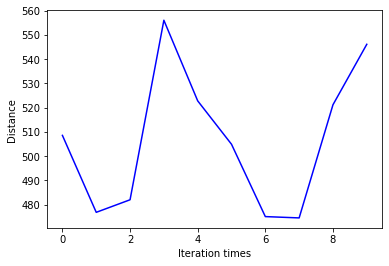

In [8]:
# make a history list #####
history = []
the_best_seq = 0


# do iteration-n times #########
iteration = 10
print("total iterations= ",iteration)
for i in range(iteration):
    print('iteration= ',i,'------>')
    seq_current = init(51)
    neighbor = []
    
    #temp will drop from t_max=100 to t_min=10
    count = 0
    t_max = 100 # temperature max in SA
    t_min = 10
    seq_best = []
    
    while t_max > t_min:
        #print('t_max=',t_max,' perform local search for 10 neighbors===')
        best_value = totalDistance(seq_best,dic)
       #neighbors = neighbor_f(seq_current,10)
        neighbors = neighbor_f(seq_current,10)
        #print('current seq distance',evalu(seq_current,dic))
        (seq_current,seq_best) = determineSA(neighbors,seq_current,dic,t_max,seq_best)
        
        ### 降溫機制: #########################################
        if totalDistance(seq_current,dic) >= best_value:
            count += 1
        else:
            count = 0
            #print(best_value)
        if count == 10:
            t_max *= 0.999
            count = 0
            #print(t_max)
        #if time.time() > t1+50:
        #    break
        ##############################################
    #Output each iteration
    #print('current seq distance', evalu(seq_current,dic))
    #print('seq_current',seq_current)
    #print('seq_current evaluation=',evalu(seq_current,dic))
    print('seq_best evaluation=',totalDistance(seq_best,dic))
    
    history.append(totalDistance(seq_current,dic))
    if i == 0:
        the_best_seq = totalDistance(seq_best,dic)
    else:
        if the_best_seq > totalDistance(seq_best,dic):
            the_best_seq = totalDistance(seq_best,dic)
#output for final result

print('           average:',get_average(history))
print('Standard deciation:',get_stddev(history))
print('The Best Seq_value:',the_best_seq)

y = history

plt.plot(y,color="blue")
plt.xlabel("Iteration times")
plt.ylabel("Distance")